                        Model      RMSE  R² Score
0           Linear Regression  0.745581  0.575788
1  Random Forest (GridSearch)  0.544570  0.773692
2            Ridge Regression  0.745522  0.575855
3            Lasso Regression  0.783270  0.531817


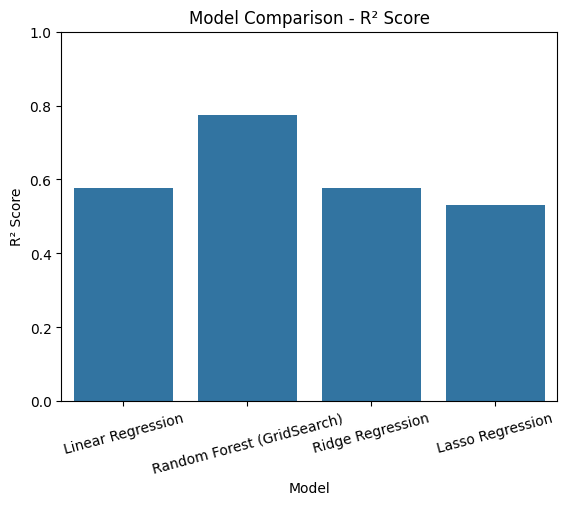

In [ ]:


# Install required packages
!pip install scikit-learn pandas matplotlib seaborn --quiet

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Step 4: RandomForest with GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Step 5: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Step 6: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Step 7: Compare Results
def evaluate(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return pd.Series({'Model': model_name, 'RMSE': rmse, 'R² Score': r2})

results = pd.DataFrame([
    evaluate('Linear Regression', y_test, y_pred_lr),
    evaluate('Random Forest (GridSearch)', y_test, y_pred_rf),
    evaluate('Ridge Regression', y_test, y_pred_ridge),
    evaluate('Lasso Regression', y_test, y_pred_lasso)
])

# Step 8: Display Results
print(results)

# Optional: Visualize comparison
sns.barplot(x='Model', y='R² Score', data=results)
plt.title("Model Comparison - R² Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()